### Heart Disease classification

Importing Libraries

In [81]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,classification_report,plot_confusion_matrix

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('heart.csv')

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0


In [12]:
df.shape

(303, 14)

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

# Data Visualization

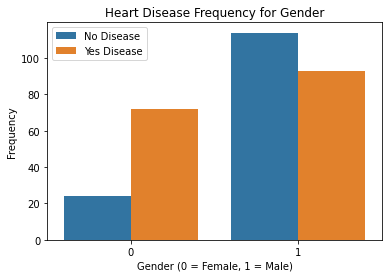

In [17]:
sns.countplot('sex', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

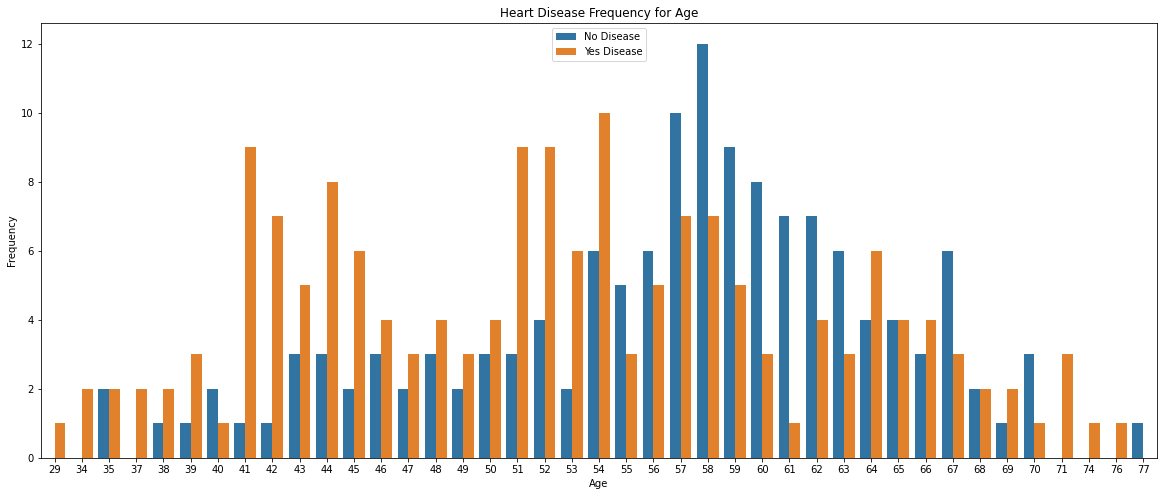

In [18]:
plt.figure(figsize = (20, 8))
sns.countplot('age', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Age')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

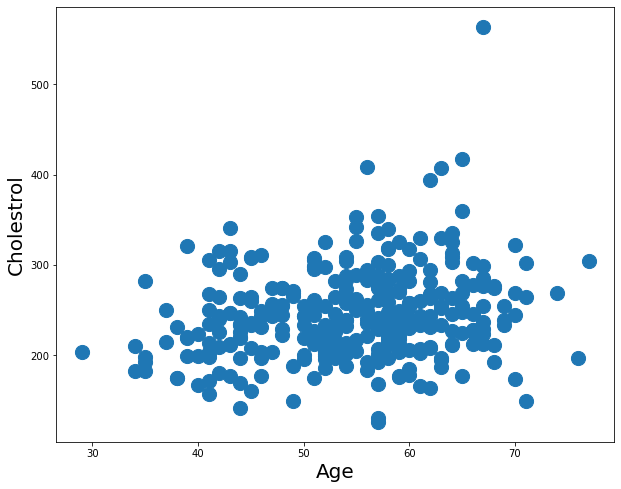

In [19]:
plt.figure(figsize = (10, 8))

plt.scatter(df['age'], df['chol'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)
plt.show()

### Splitting the data

In [20]:
features = df.drop('target', axis=1)

target = df[['target']]

In [21]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2


In [22]:
target.sample(5)

,target
295,0
160,1
53,1
100,1
43,1


In [23]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [24]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [26]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


### Splitting dataset into training and testing data

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [28]:
x_train.shape, y_train.shape

((242, 13), (242, 1))

In [29]:
x_test.shape, y_test.shape

((61, 13), (61, 1))

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.15,
                                                  random_state=10)

In [31]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [32]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

Building the model

In [33]:
def build_model():
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [34]:
model = build_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [35]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [36]:
num_epochs=100

In [37]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [38]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 84ms/step - loss: 0.7428 - accuracy: 0.5707 - precision_1: 0.5650 - rec

Plotting accuracy

In [39]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

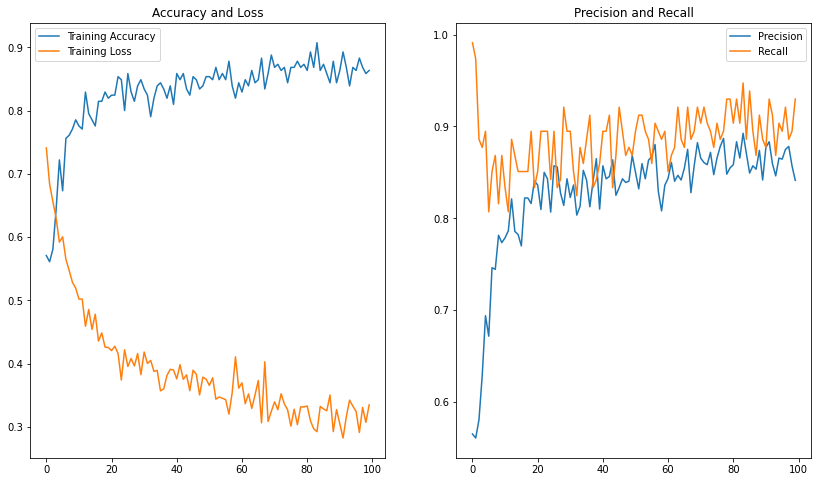

In [40]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

Model evaluation

In [41]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

61/61 [==============================] - 0s 49us/sample - loss: 0.5624 - accuracy: 0.7049 - precision_1: 0.6857 - recall_1: 0.7742


loss           0.562352
accuracy       0.704918
precision_1    0.685714
recall_1       0.774194
dtype: float64

Prediction

In [42]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.03731686],
       [0.8494936 ],
       [0.01760644],
       [0.01070619],
       [0.01696017],
       [0.01137015],
       [0.00420865],
       [0.40659434],
       [0.00529382],
       [0.98633367]], dtype=float32)

In [43]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [44]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [45]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [46]:
pred_results.sample(10)

,y_test,y_pred
7,1,0
9,1,1
11,0,0
36,1,0
49,1,1
13,0,1
26,0,0
10,1,0
0,0,0
25,1,1


In [47]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,19,7
1,11,24


In [48]:
accuracy_score(y_test, y_pred)

0.7049180327868853

In [49]:
precision_score(y_test, y_pred)

0.6857142857142857

In [50]:
recall_score(y_test, y_pred)

0.7741935483870968

# Random Forest

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier()
# Fit the model to the data
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7704918032786885

In [66]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [67]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   58.7s finished


In [68]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [70]:
# Evaluate the randomized search random forest model
rs_rf.score(x_test, y_test)

0.7704918032786885

In [71]:
preds = model.predict(x_test)

In [72]:
confusion_matrix(y_test,preds)

array([[20, 10],
       [ 4, 27]], dtype=int64)

In [73]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [74]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} 

In [75]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [76]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [77]:
grid.best_params_

{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 128,
 'oob_score': False}

In [78]:
predictions = grid.predict(x_test)

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



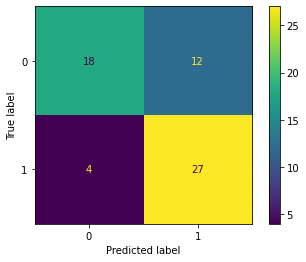

In [83]:
plot_confusion_matrix(grid,x_test,y_test)

In [101]:
model.feature_importances_

array([0.0807797 , 0.07077769, 0.08442296, 0.11956305, 0.09349281,
       0.03293586, 0.00646284, 0.08121326, 0.18500881, 0.1297291 ,
       0.03741469, 0.06053653, 0.01766271])

In [102]:
feats = pd.DataFrame(index=processed_features.columns,data=model.feature_importances_,columns=['Importance'])

In [103]:
feats

,Importance
age,0.080780
trestbps,0.070778
chol,0.084423
thalach,0.119563
oldpeak,0.093493
sex,0.032936
fbs,0.006463
exang,0.081213
cp,0.185009
ca,0.129729


In [88]:
imp_feats = feats[feats['Importance']>0]

In [89]:
imp_feats

,Importance
age,0.080780
trestbps,0.070778
chol,0.084423
thalach,0.119563
oldpeak,0.093493
sex,0.032936
fbs,0.006463
exang,0.081213
cp,0.185009
ca,0.129729


In [90]:
imp_feats = imp_feats.sort_values("Importance")

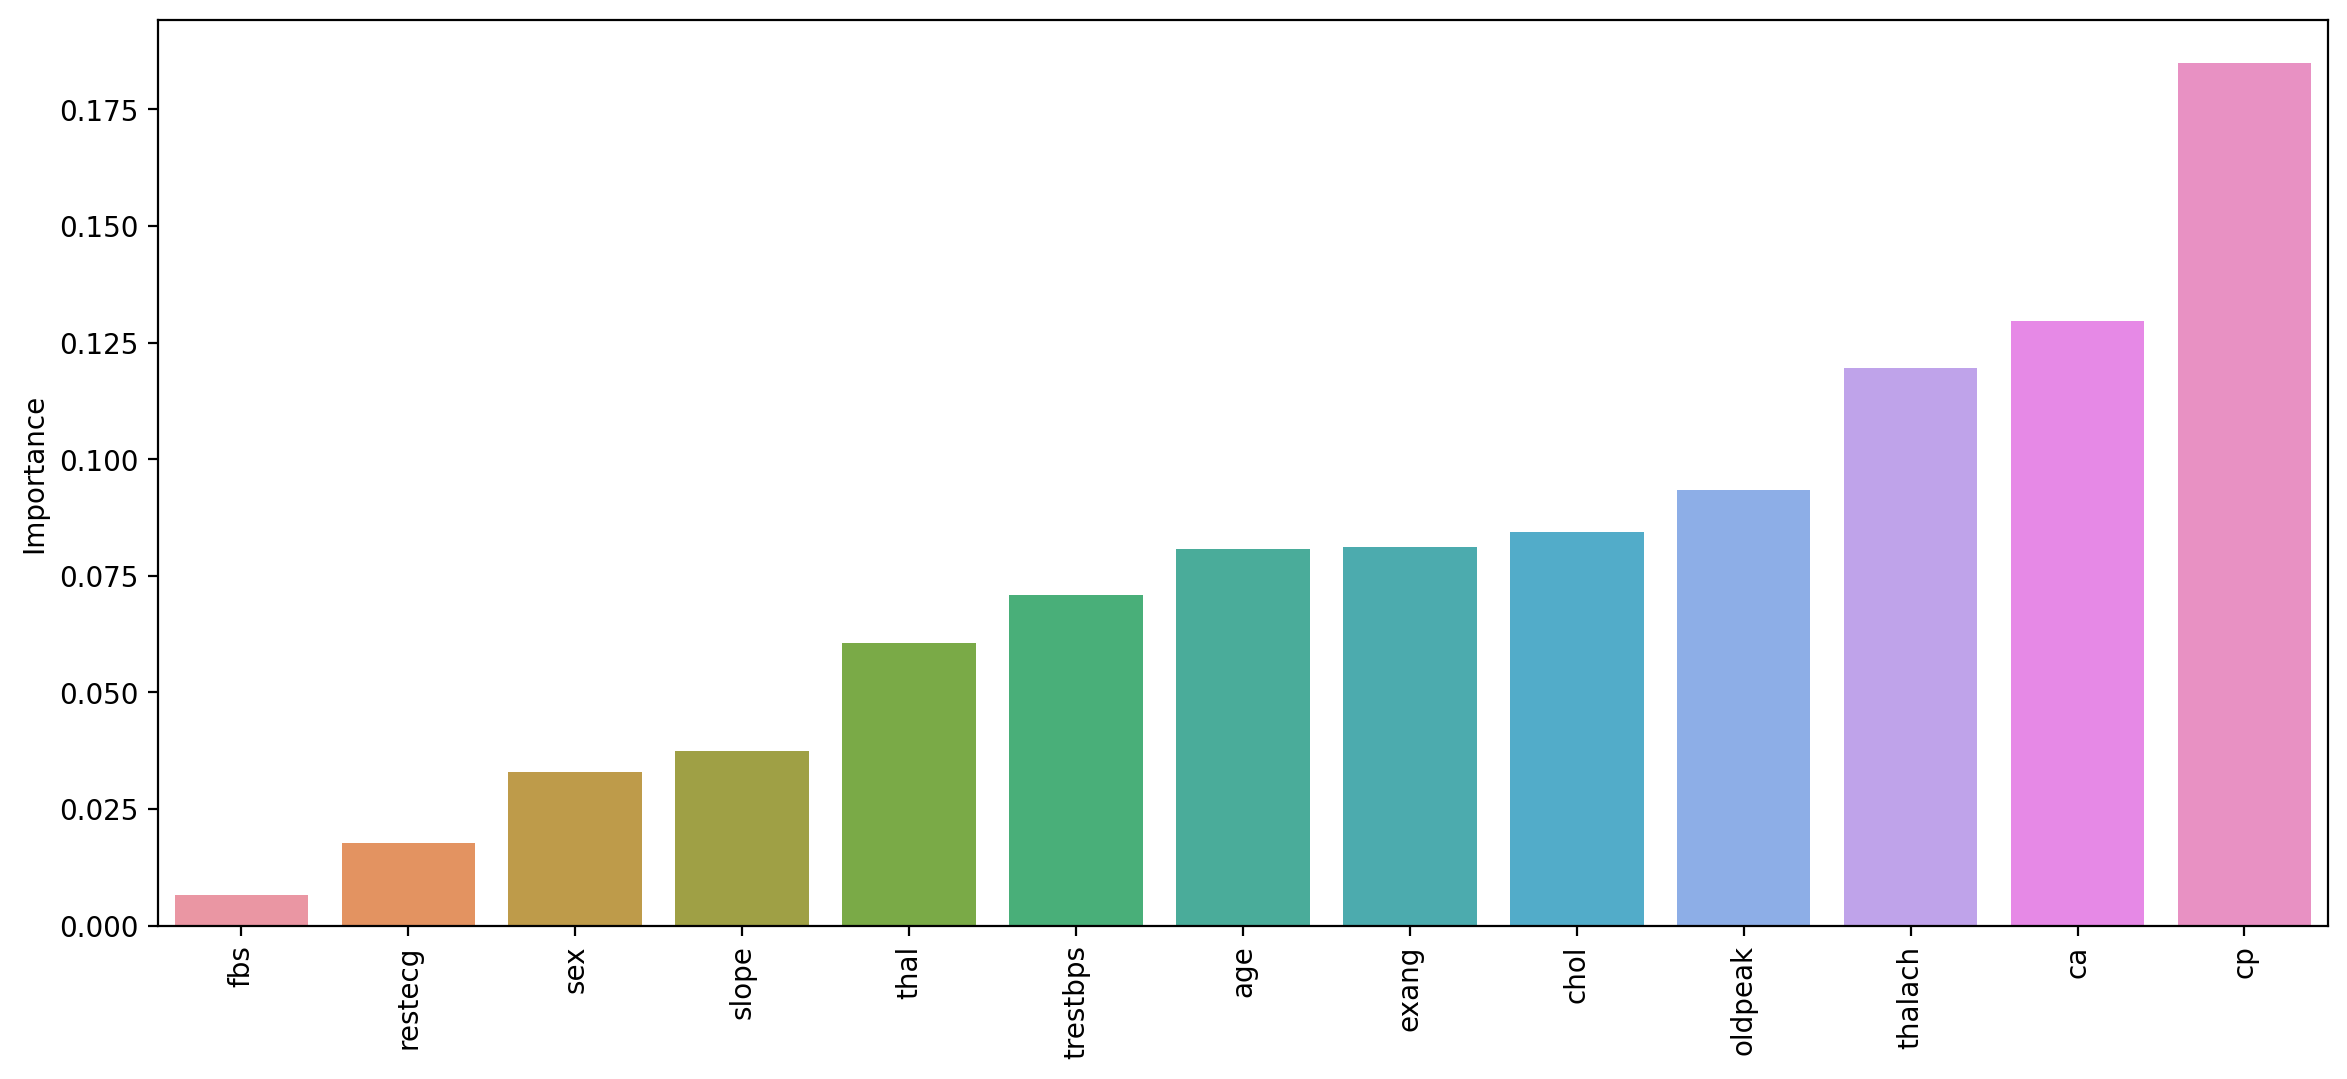

In [91]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);


# XGBoost

In [52]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

[21:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Making the Confusion Matrix

In [59]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19 11]
 [ 5 26]]


0.7377049180327869

## Applying k-Fold Cross Validation

In [61]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [92]:
classifier.feature_importances_

array([0.03495988, 0.03277235, 0.031332  , 0.02538867, 0.06313596,
       0.04881488, 0.        , 0.2241529 , 0.30995792, 0.11680273,
       0.02505307, 0.0565954 , 0.03103425], dtype=float32)

In [93]:
feats = pd.DataFrame(index=processed_features.columns,data=classifier.feature_importances_,columns=['Importance'])

In [94]:
feats

,Importance
age,0.034960
trestbps,0.032772
chol,0.031332
thalach,0.025389
oldpeak,0.063136
sex,0.048815
fbs,0.000000
exang,0.224153
cp,0.309958
ca,0.116803


In [95]:
imp_feats = feats[feats['Importance']>0]

In [97]:
imp_feats

,Importance
age,0.034960
trestbps,0.032772
chol,0.031332
thalach,0.025389
oldpeak,0.063136
sex,0.048815
exang,0.224153
cp,0.309958
ca,0.116803
slope,0.025053


In [98]:
imp_feats = imp_feats.sort_values("Importance")

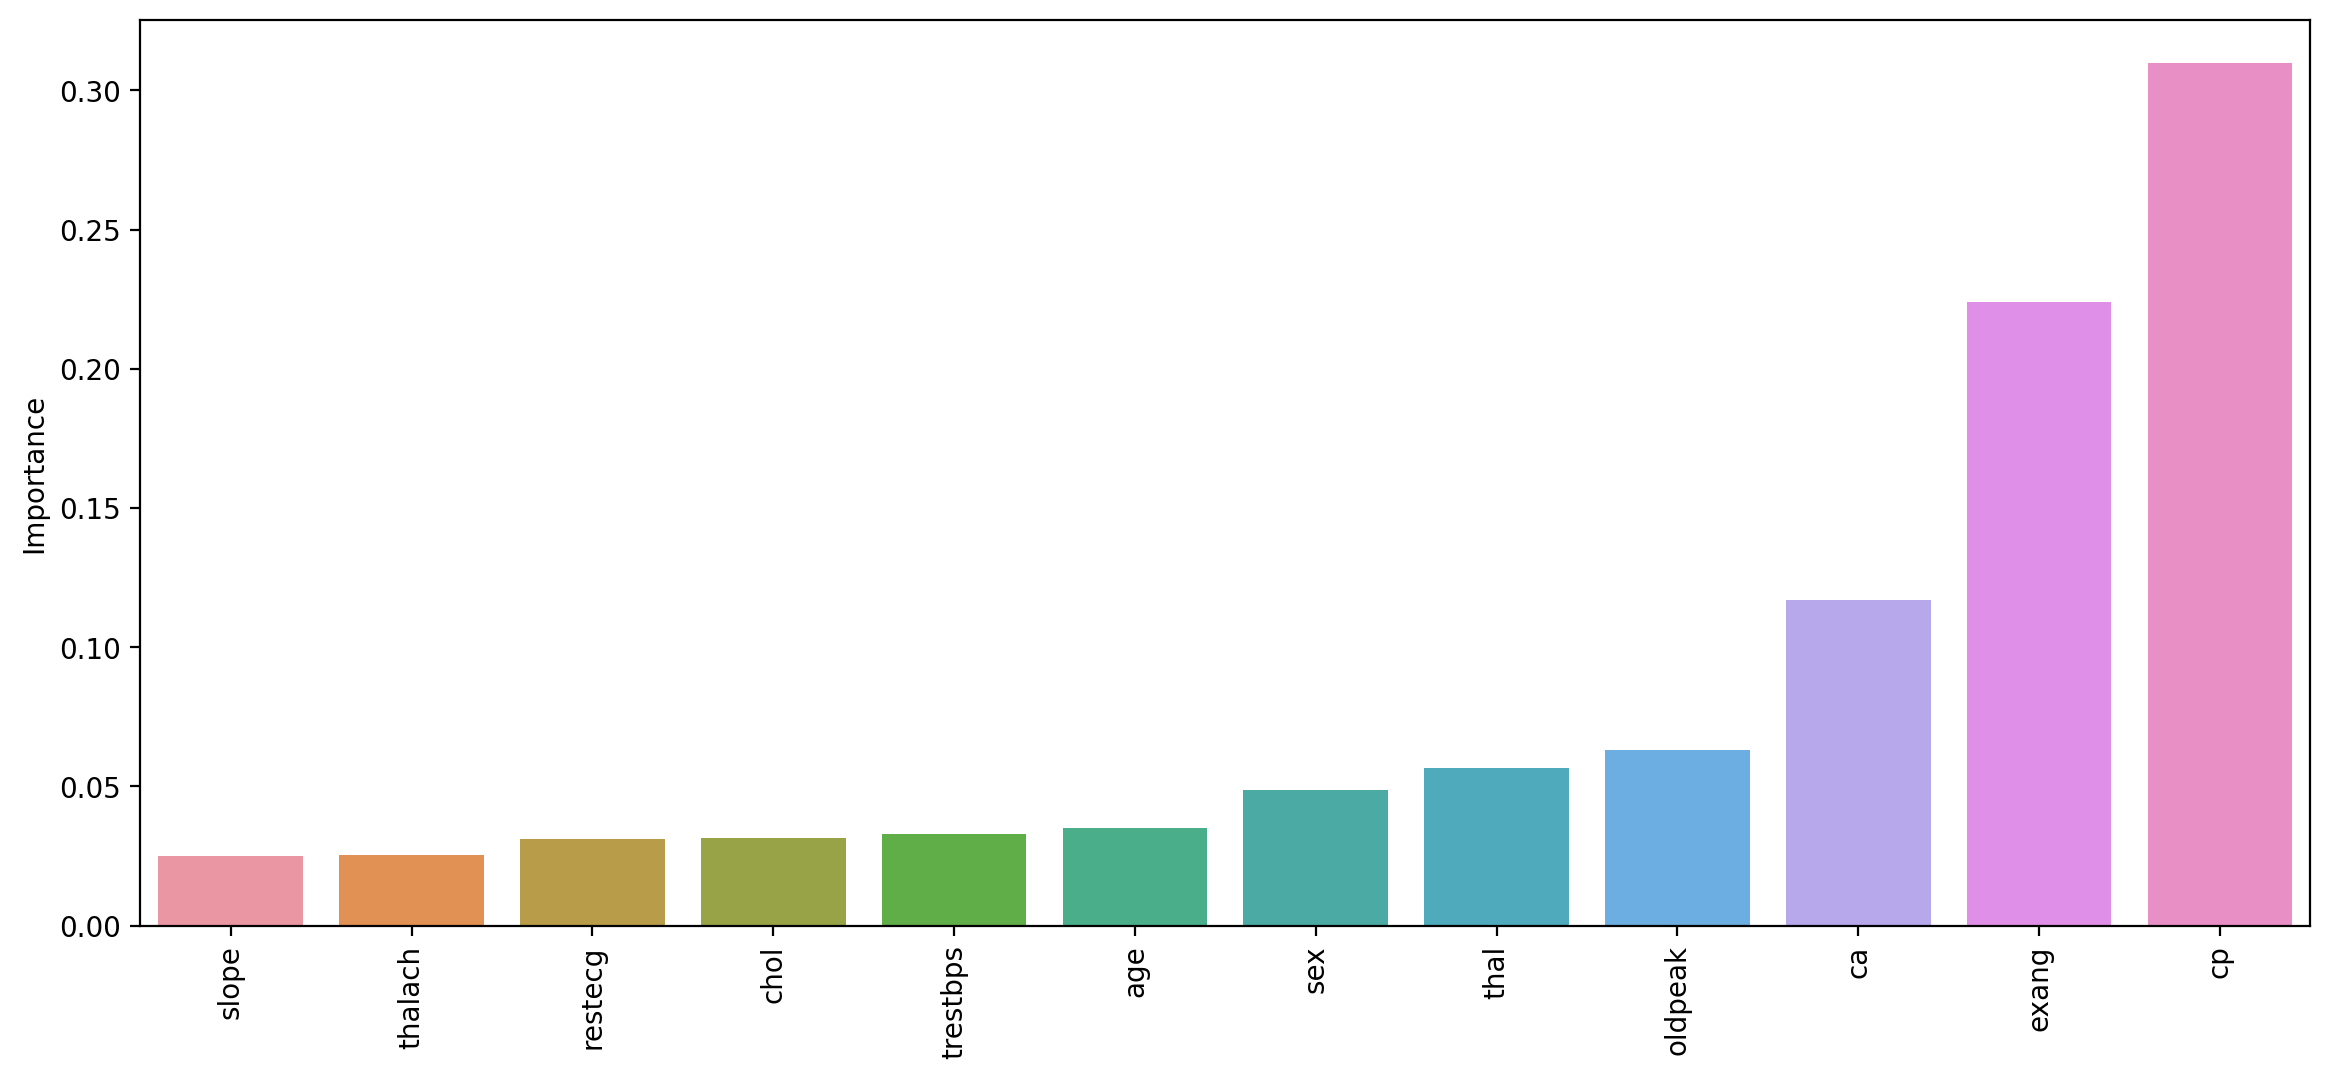

In [99]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);